In [9]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
from textblob import TextBlob #sentiment analysis
import nltk #Natural language toolkit
from nltk import word_tokenize, sent_tokenize #split a document or paragraph into sentences.
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer #lemmatization uses the context in which the word is being used

In [10]:
amz_reviews = pd.read_csv("/content/Review.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [11]:
amz_reviews.head(3)

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ


In [12]:
amz_reviews.shape

(34660, 21)

In [13]:
amz_reviews.columns

Index(['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
       'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username'],
      dtype='object')

In [14]:
columns = ['id','name','keys','manufacturer','reviews.dateAdded', 'reviews.date','reviews.didPurchase',
          'reviews.userCity', 'reviews.userProvince', 'reviews.dateSeen', 'reviews.doRecommend','asins',
          'reviews.id', 'reviews.numHelpful', 'reviews.sourceURLs']
df = pd.DataFrame(amz_reviews.drop(columns,axis=1,inplace=False))

In [15]:
df.shape

(34660, 6)

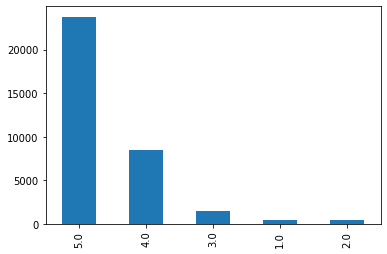

In [16]:
df['reviews.rating'].value_counts().plot(kind='bar')

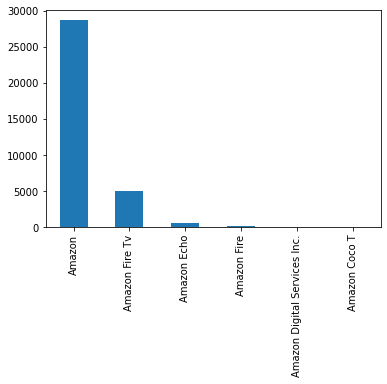

In [17]:
df.brand.value_counts().plot(kind = "bar")

In [18]:
df.shape, df.head(3)

((34660, 6),
     brand                                         categories  reviews.rating  \
 0  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...             5.0   
 1  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...             5.0   
 2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...             5.0   
 
                                         reviews.text  \
 0  This product so far has not disappointed. My c...   
 1  great for beginner or experienced person. Boug...   
 2  Inexpensive tablet for him to use and learn on...   
 
                              reviews.title reviews.username  
 0                                   Kindle          Adapter  
 1                                very fast           truman  
 2  Beginner tablet for our 9 year old son.            DaveZ  )

Data pre-processing for textual variables


In [19]:
df['nchar'] = df['reviews.text'].str.len()

In [20]:
df.head()

,brand,categories,reviews.rating,reviews.text,reviews.title,reviews.username,nchar
0,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",5.0,This product so far has not disappointed. My c...,Kindle,Adapter,143.0
1,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",5.0,great for beginner or experienced person. Boug...,very fast,truman,75.0
2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ,131.0
3,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks,593.0
4,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42,613.0


In [21]:
df['nchar'].describe()

count    34659.000000
mean       159.047434
std        185.837884
min          3.000000
25%         70.000000
50%        106.000000
75%        183.000000
max      10670.000000
Name: nchar, dtype: float64

In [22]:
df[df['reviews.rating'] == 1]

,brand,categories,reviews.rating,reviews.text,reviews.title,reviews.username,nchar
126,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",1.0,i Bought this around black friday for $60 hopi...,TERRIBLE DONT BUY,Brandon,1080.0
169,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",1.0,I bought this tablet for my 4 year old daughte...,Ended up returning,Mijenx,123.0
241,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",1.0,Didn't want to go to the sites amazon wanted m...,returned item,turtle,51.0
297,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",1.0,This Kindle is so overloaded with apps that I ...,Too may preloaded useless apps,HDelbrucke,480.0
310,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",1.0,I liked it at first except the browser is kind...,Broke in 5 mos,Jimbo,384.0
...,...,...,...,...,...,...,...
34654,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",1.0,This is exactly like any other usb power charg...,Not Necessary,mir_,155.0
34656,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",1.0,Amazon should include this charger with the Ki...,Should be included,Jonathan Stewart,255.0
34657,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",1.0,Love my Kindle Fire but I am really disappoint...,Disappointing Charger,J Lawson,314.0
34658,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",1.0,I was surprised to find it did not come with a...,Not worth the money,Just the Buyer,231.0


In [23]:
df.isnull().sum()

brand                0
categories           0
reviews.rating      33
reviews.text         1
reviews.title        5
reviews.username     2
nchar                1
dtype: int64

In [24]:
import nltk
nltk.download('punkt') # This tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, collocations, and words that start sentences.
words = nltk.word_tokenize('this is sparta')
words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['this', 'is', 'sparta']

In [25]:
df = df.dropna(inplace=False)

In [26]:
df.shape

(34620, 7)

In [27]:
df.head()

,brand,categories,reviews.rating,reviews.text,reviews.title,reviews.username,nchar
0,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",5.0,This product so far has not disappointed. My c...,Kindle,Adapter,143.0
1,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",5.0,great for beginner or experienced person. Boug...,very fast,truman,75.0
2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ,131.0
3,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks,593.0
4,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42,613.0


In [28]:
df['reviews.text'] = df['reviews.text'].astype(str)

In [29]:
df['reviews.text'][100]

'I purchased 2 of these tablets for my 6 and 8 year old. They were a Black Friday special for $59. They are perfect for the apps and games they wanted.'

Lowercasing


In [30]:
## To lower case everything
df['reviews.text'] = df['reviews.text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [31]:
df['reviews.text'][2]

'inexpensive tablet for him to use and learn on, step up from the nabi. he was thrilled with it, learn how to skype on it already...'

Special characters

In [32]:
## remove punctuation
df['reviews.text'] = df['reviews.text'].str.replace('[^\w\s]','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [33]:
df['reviews.text'][100]

'i purchased 2 of these tablets for my 6 and 8 year old they were a black friday special for 59 they are perfect for the apps and games they wanted'

Stopwords

In [34]:
## remove stopwords
import nltk
nltk.download("stopwords")

from nltk.corpus import stopwords
stop = stopwords.words('english')
df['reviews.text'] = df['reviews.text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['reviews.text'][2]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


'inexpensive tablet use learn step nabi thrilled learn skype already'

####Most occuring words

In [35]:
most = pd.Series(' '.join(df['reviews.text']).split()).value_counts()[:10]
most

great     11719
tablet     8957
use        7582
love       6573
easy       6127
amazon     5657
kindle     5221
bought     5044
good       4993
one        4928
dtype: int64

In [36]:
most = list(most.index)
df['reviews.text'] = df['reviews.text'].apply(lambda x: " ".join(x for x in x.split() if x not in most))
df['reviews.text'].head()

0    product far disappointed children like ability...
1               beginner experienced person gift loves
2    inexpensive learn step nabi thrilled learn sky...
3    ive fire hd 8 two weeks valuewe prime members ...
4    grand daughter comes visit set user entered ag...
Name: reviews.text, dtype: object

In [37]:
df['reviews.text'][4]

'grand daughter comes visit set user entered age name makes sure accesses sites content appropriate age simple loves capabilities also installed 64gig sd card gives little plenty storage price think best spend hundreds dollars additional speed capacity comes basics tablets everything people ever need fraction cost'

In [38]:
most2 = pd.Series(' '.join(df['reviews.text']).split()).value_counts()[:10]
most2

fire       4775
price      4130
like       3796
product    3523
tv         3211
would      3176
works      3089
get        2978
echo       2862
much       2763
dtype: int64

In [39]:
from textblob import TextBlob

In [40]:
df['reviews.text'][1]

'beginner experienced person gift loves'

In [41]:
TextBlob(df['reviews.text'][1]).words

WordList(['beginner', 'experienced', 'person', 'gift', 'loves'])

Stemming

In [42]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
df['reviews.text'] = df['reviews.text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [43]:
df['reviews.text'][1]

'beginn experienc person gift love'

In [44]:
#make wordcoud

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

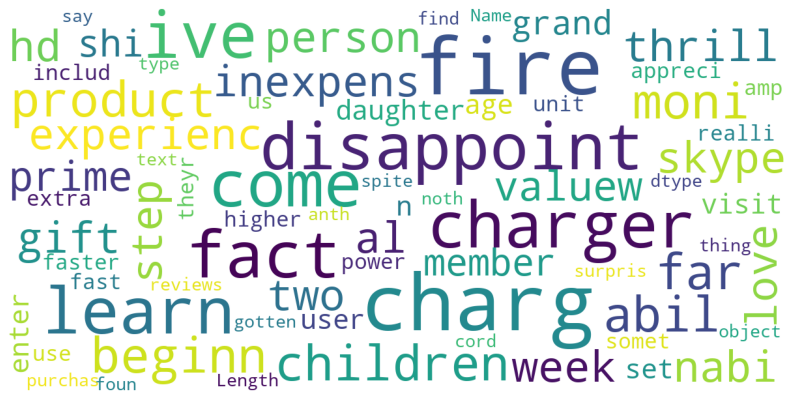

In [45]:
def show_wordcloud(col, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=500,
        max_font_size=40, 
        scale=3,
        random_state=1
    ).generate(str(col))

    fig = plt.figure(1, figsize=(14, 14))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()


if __name__ == '__main__':

    show_wordcloud(df['reviews.text'])

Sentiment Score

In [46]:
from textblob import TextBlob
statement = "expensive tablet"
sentiment1 = TextBlob(statement).sentiment

In [47]:
sentiment1

Sentiment(polarity=-0.5, subjectivity=0.7)

In [48]:
def senti(x):
    return TextBlob(x).sentiment    

In [49]:
df['senti_score'] = df['reviews.text'].apply(senti)

In [50]:
df.senti_score.head()

0                                   (0.1, 1.0)
1                                   (0.5, 0.6)
2                                   (0.0, 0.0)
3    (0.18124999999999997, 0.6489583333333333)
4                    (0.5, 0.5827777777777777)
Name: senti_score, dtype: object

In [51]:
df.shape

(34620, 8)

In [52]:
df.head()

,brand,categories,reviews.rating,reviews.text,reviews.title,reviews.username,nchar,senti_score
0,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",5.0,product far disappoint children like abil moni...,Kindle,Adapter,143.0,"(0.1, 1.0)"
1,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",5.0,beginn experienc person gift love,very fast,truman,75.0,"(0.5, 0.6)"
2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",5.0,inexpens learn step nabi thrill learn skype al...,Beginner tablet for our 9 year old son.,DaveZ,131.0,"(0.0, 0.0)"
3,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",4.0,ive fire hd 8 two week valuew prime member shi...,Good!!!,Shacks,593.0,"(0.18124999999999997, 0.6489583333333333)"
4,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",5.0,grand daughter come visit set user enter age n...,Fantastic Tablet for kids,explore42,613.0,"(0.5, 0.5827777777777777)"
